In [1]:
# Import dependencies 
import laspy
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

In [2]:
# Function to load point clouds
def load_pcs(folder):
    pc_list = []

    for filename in os.listdir(folder):
        file = os.path.join(folder, filename)
        pc = laspy.read(file)
        name = filename.split(".")[0]
        pc_list.append({"name": name, "laz_file": pc})

    return pc_list

# Function to access the x, y, and z coordinates
def get_PC_coordinates(laz_file):
    x_coordinates = laz_file.x
    y_coordinates = laz_file.y
    z_coordinates = laz_file.z

    return (x_coordinates, y_coordinates, z_coordinates)

# Get the range of the coordinates in the cloud
# Formatted as a tuple of tupes ((min x, max x), (min y, max y), (min z, max z))
def coor_range(file):
    x, y, z = get_PC_coordinates(file)

    return ((min(x), max(x)), (min(y), max(y)), (min(z), max(z)))

In [3]:
curb_list = load_pcs("../data/samples/curbs/point clouds")
cw_list = load_pcs("../data/samples/crosswalks/point clouds")

for pc in curb_list:
    pc["og_coords"] = get_PC_coordinates(pc['laz_file'])

for pc in cw_list:
    pc["og_coords"] = get_PC_coordinates(pc['laz_file'])

In [4]:
# Function to clean coordinates based on a coordinate bound
def clean_coords(og_coords, lower, upper, axis):
    # Get indices of values that fall outsite of bounds
    indices = [index for index, item in enumerate(og_coords[axis]) if item < lower or item > upper]

    # Remove datapoints outside of bounds
    x = [value for index, value in enumerate(og_coords[0]) if index not in indices]
    y = [value for index, value in enumerate(og_coords[1]) if index not in indices]
    z = [value for index, value in enumerate(og_coords[2]) if index not in indices]
    
    return (x, y, z)

In [5]:
# Create subplots for different views
def sub_plot(fig, subplot, x, y, z, elev, azim, scale):
    # Set axis
    ax = fig.add_subplot(subplot, projection='3d')

    # Create plot
    ax.scatter(x, y, z, c=z, cmap='viridis', s=0.1)

    # Set labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Set range for all axes
    mid = (max(x) + min(x)) / 2
    ax.set_xlim([mid - max_range / 2, mid + max_range / 2])
    mid = (max(y) + min(y)) / 2
    ax.set_ylim([mid - max_range / 2, mid + max_range / 2])
    mid = (max(z) + min(z)) / 2
    ax.set_zlim([min(z) - 0.5, max(z) + 0.5])

    # Hide ticks
    ax.xaxis.offsetText.set_visible(False)
    ax.yaxis.offsetText.set_visible(False)

    # Add colorbar to show the gradient
    if scale:
        cbar = plt.colorbar(ax.collections[0], ax=ax, orientation='vertical', shrink=0.5)
        cbar.set_label('Z Axis Gradient')

    # Set view
    ax.view_init(elev, azim)

# Plot curb 
def plot_curb(name, coordinates, elev, azim):
    x, y, z = coordinates 

    # Calculate max range among dimensions
    global max_range
    max_range = max(max(x) - min(x), max(y) - min(y), max(z) - min(z))

    # Calculate the gradient color scheme for the Z axis
    global colors
    colors = z - min(z)

    # Create figure 
    fig = plt.figure(figsize=(15, 5))
    fig.suptitle(name + " gradient plot", fontsize=16)

    # Create subplots
    # Side view
    sub_plot(fig, 131, x, y, z, elev[0], azim[0], True)
    # Halfway view
    sub_plot(fig, 132, x, y, z, elev[1], azim[1], False)
    # Front view
    sub_plot(fig, 133, x, y, z, elev[2], azim[2], False)

    plt.tight_layout()

    plt.show()


# Curb analysis

It can be hard to see the properties of the curbs in cloud compare. Furthermore, it is important to analyze the numerical features as these will be used for the identification.

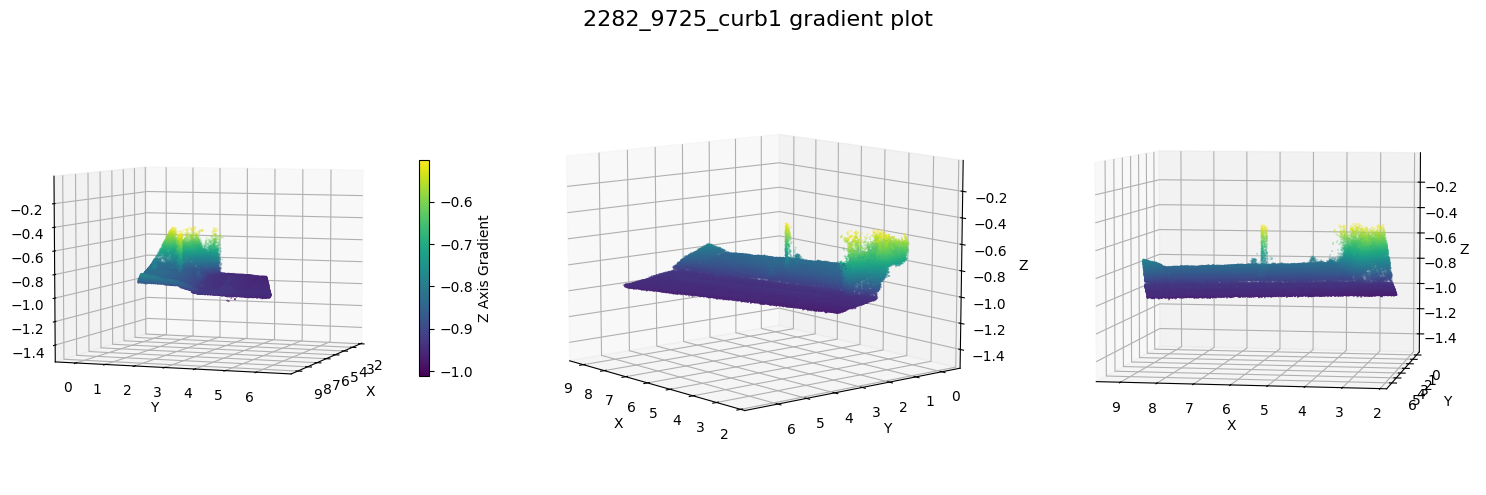

In [6]:
# Clean coordinates
curb_list[0]["clean_coords"] = clean_coords(curb_list[0]['og_coords'], min(curb_list[0]['og_coords'][2]), -0.5, 2)

# Plot curb
plot_curb(curb_list[0]['name'], curb_list[0]['clean_coords'], [5, 10, 5], [20, 140, 100])

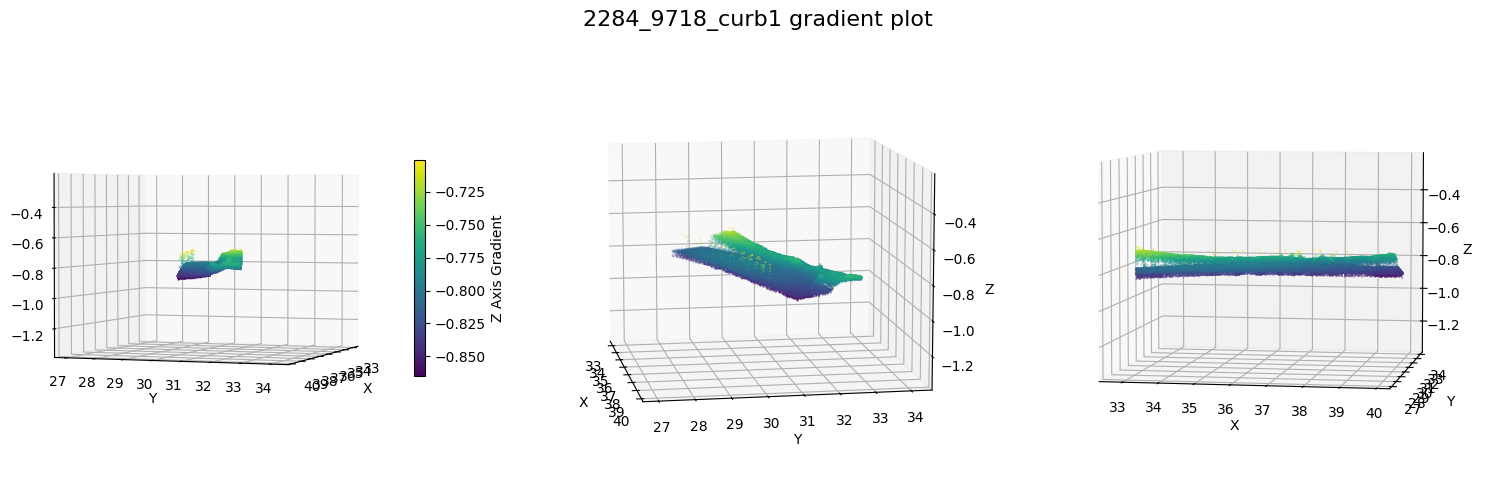

In [7]:
# Clean coordinates
curb_list[1]["clean_coords"] = clean_coords(curb_list[1]['og_coords'], min(curb_list[1]['og_coords'][2]), -0.7, 2)

# Plot curb
plot_curb(curb_list[1]['name'], curb_list[1]['clean_coords'], [2, 10, 5], [20, -10, -80])

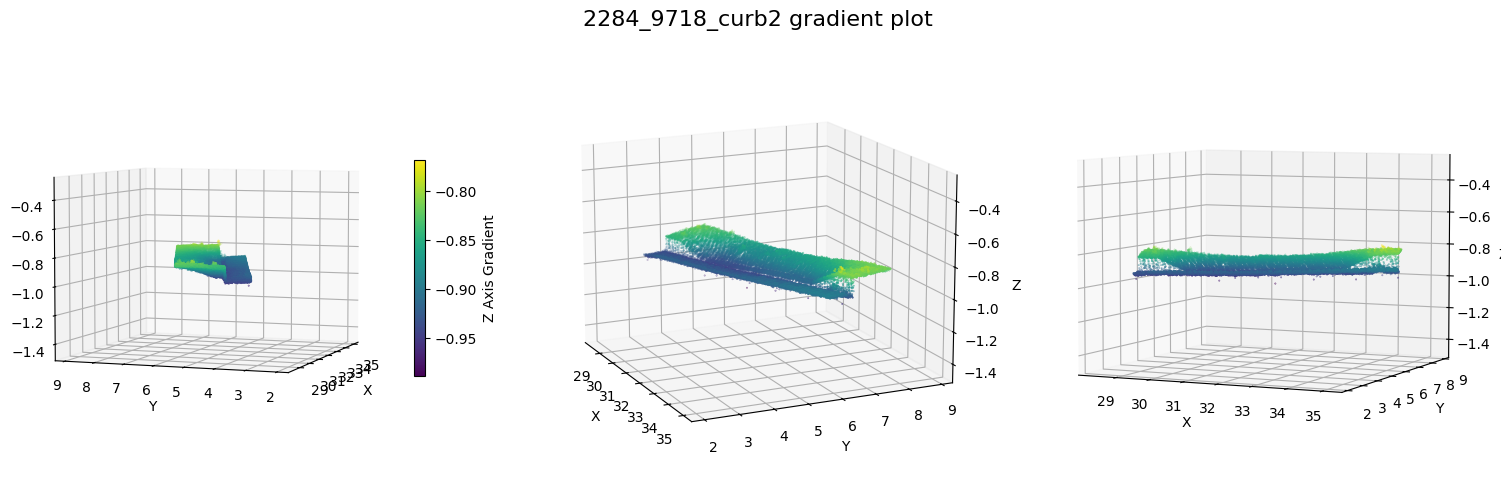

In [8]:
# Clean coordinates
curb_list[2]["clean_coords"] = clean_coords(curb_list[2]['og_coords'], min(curb_list[2]['og_coords'][2]), max(curb_list[2]['og_coords'][2]), 2)

plot_curb(curb_list[2]['name'], curb_list[2]['og_coords'], [5, 15, 5], [200, -25, -65])

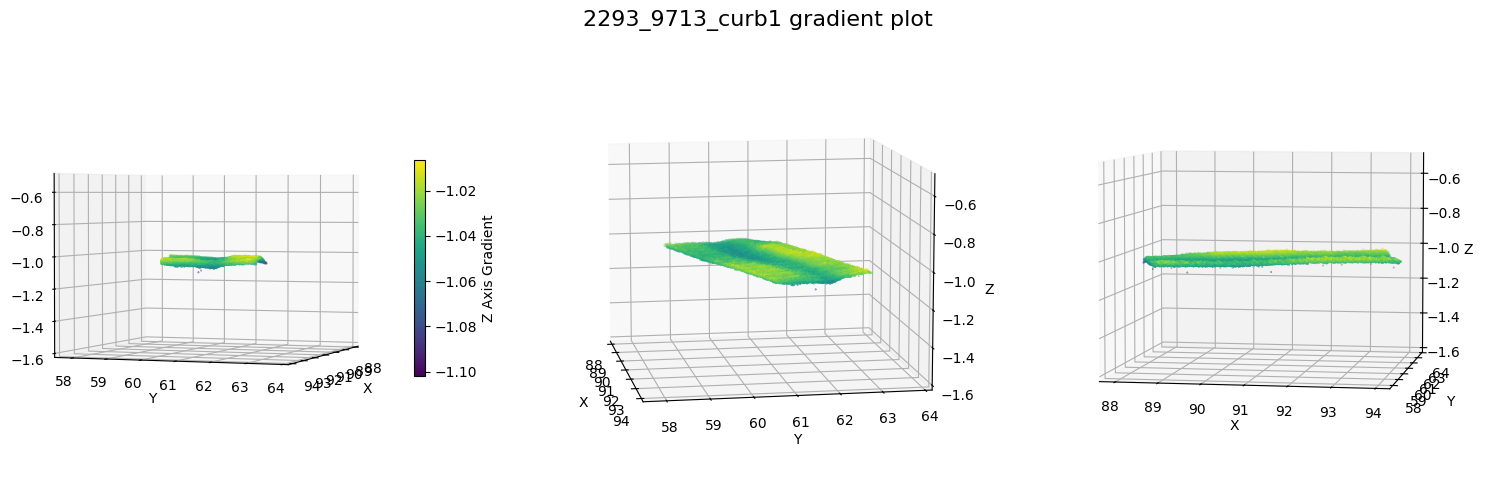

In [9]:
# Clean coordinates
curb_list[3]["clean_coords"] = clean_coords(curb_list[3]['og_coords'], min(curb_list[3]['og_coords'][2]), -0.7, 2)

# Plot curb
plot_curb(curb_list[3]['name'], curb_list[3]['clean_coords'], [2, 10, 5], [20, -10, -80])

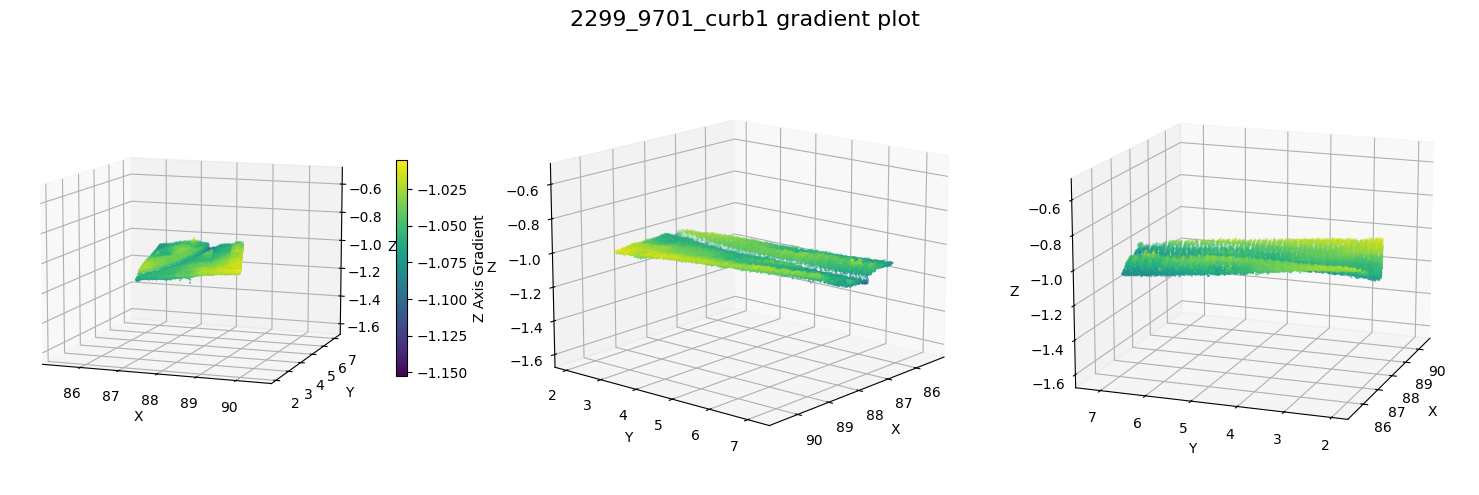

In [10]:
# Clean coordinates
curb_list[4]["clean_coords"] = clean_coords(curb_list[4]['og_coords'], min(curb_list[4]['og_coords'][2]), -1, 2)

# Plot curb
plot_curb(curb_list[4]['name'], curb_list[4]['clean_coords'], [10, 15, 15], [-70, 40, 200])

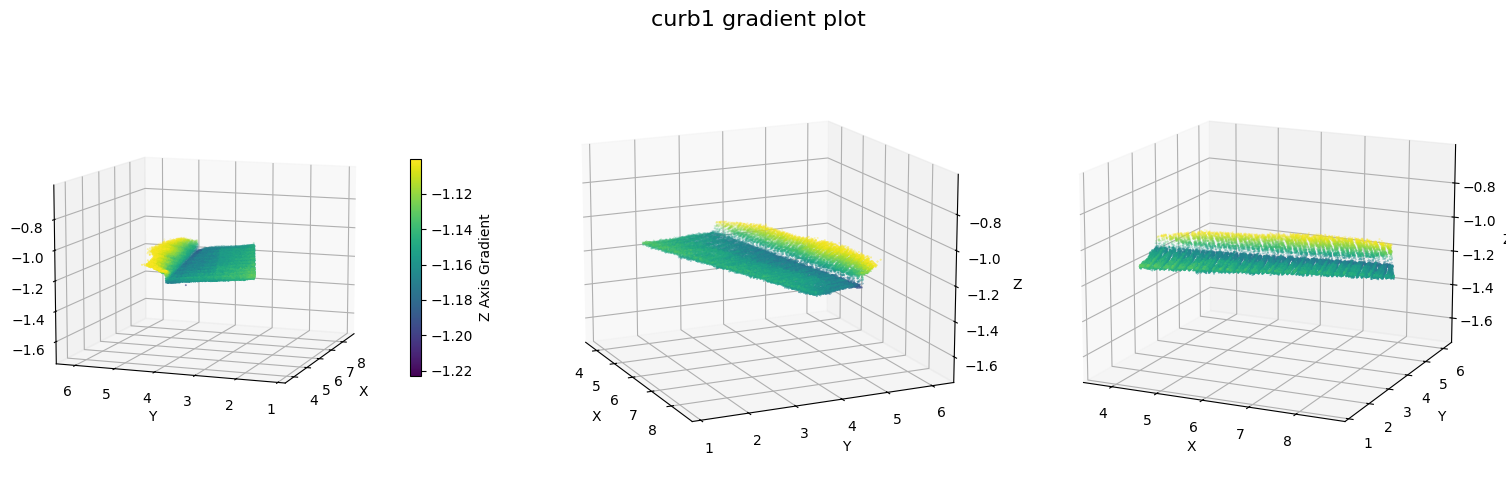

In [11]:
# Clean coordinates
curb_list[5]["clean_coords"] = clean_coords(curb_list[5]['og_coords'], -1.6, -1.1, 2)

# Plot curb
plot_curb(curb_list[5]['name'], curb_list[5]['clean_coords'], [10, 15, 15], [200, -25, -65])

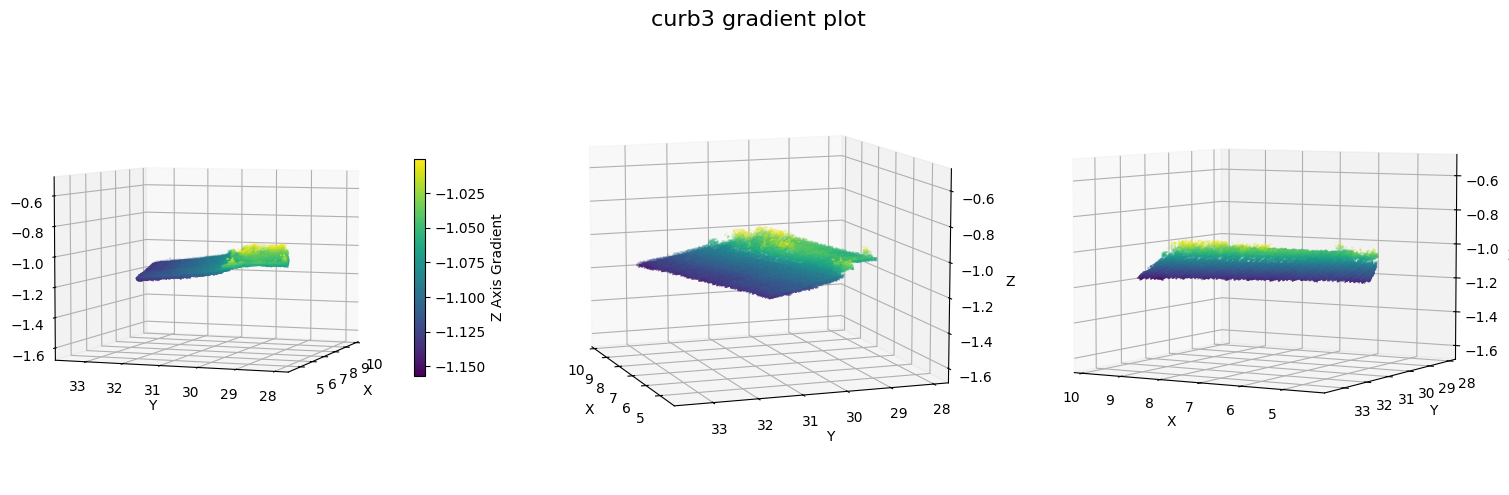

In [39]:
# Clean coordinates
curb_list[6]["clean_coords"] = clean_coords(curb_list[6]['og_coords'], -1.5, -1, 2)

# Plot curbs
plot_curb(curb_list[6]['name'], curb_list[6]['clean_coords'], [5, 10, 5], [200, 160, 120])

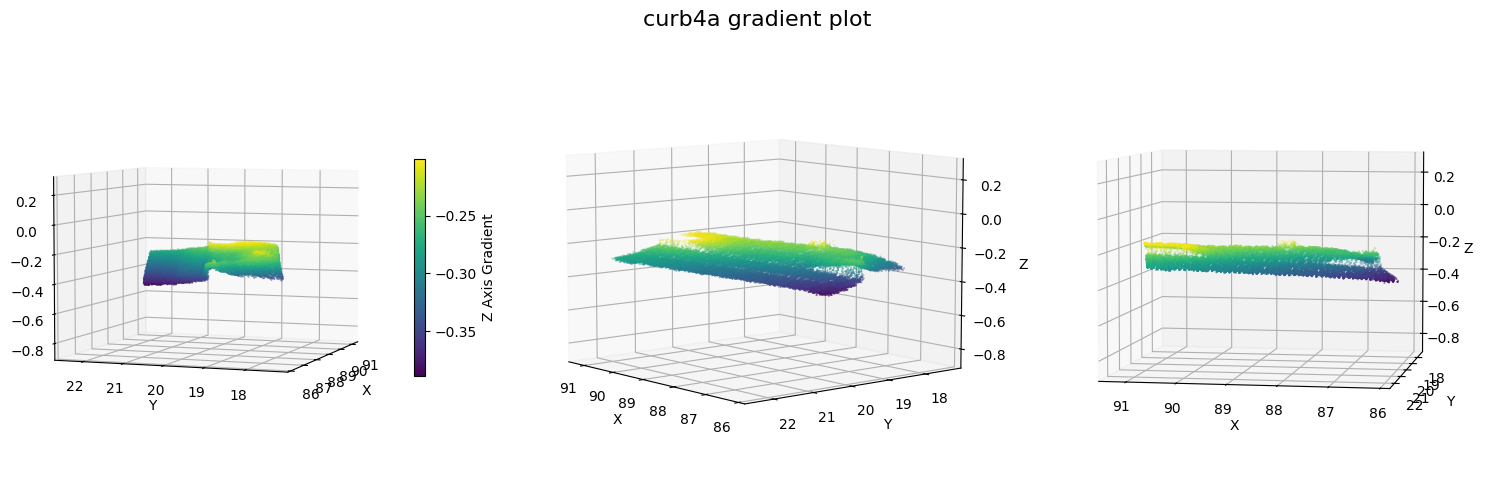

In [40]:
# Clean coordinates
curb_list[7]["clean_coords"] = clean_coords(curb_list[7]['og_coords'], -0.6, -0.2, 2)

# Plot curbs
plot_curb(curb_list[7]['name'], curb_list[7]['clean_coords'], [5, 8, 5], [200, 140, 100])

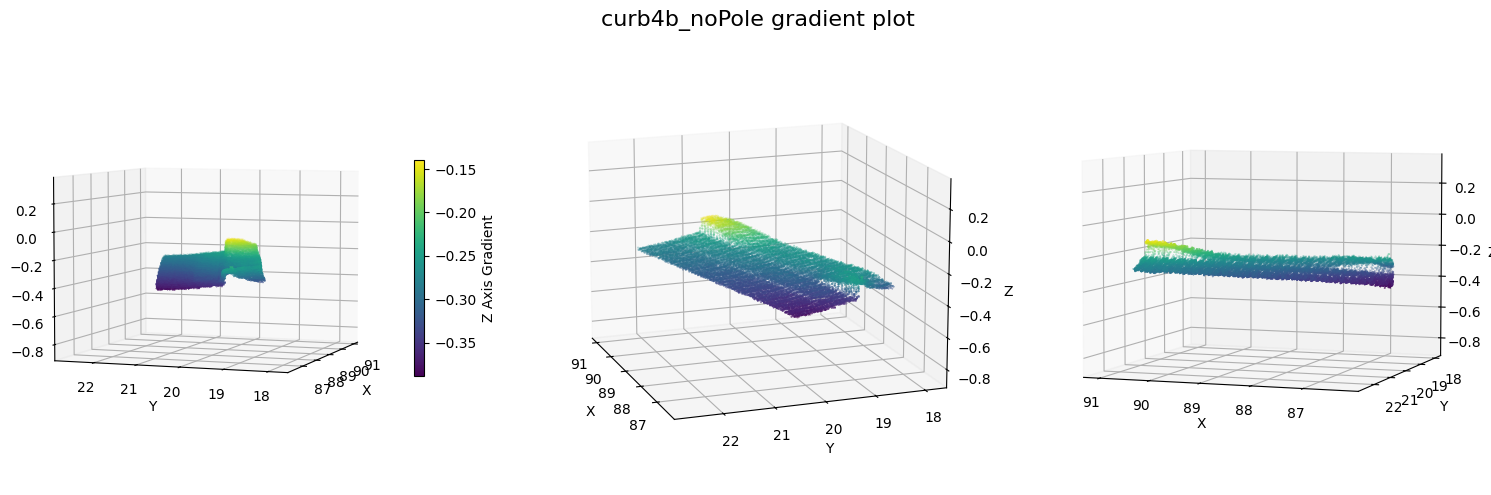

In [41]:
curb_list[8]["clean_coords"] = clean_coords(curb_list[8]['og_coords'], min(curb_list[8]['og_coords'][2]), max(curb_list[8]['og_coords'][2]), 2)

plot_curb(curb_list[8]['name'], curb_list[8]['og_coords'], [5, 15, 5], [200, 160, 110])

# Crosswalk analysis

In [15]:
# Function to get intensity value of each CW 
def get_intensity(cw):
    intensity_values = cw['laz_file'].intensity
    cw['intensity'] = intensity_values
    return cw

In [16]:
# Add intensity to cws 
for cw in cw_list:
    cw = get_intensity(cw)

In [17]:
# Function to plot CW
def plot_cw(cw, coords, intensity):
    x, y, z = coords
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, c=intensity, cmap='viridis')  # 'viridis' is one of the built-in colormaps
    plt.colorbar(label='Gradient Value')  # Add colorbar to show gradient values
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(cw['name'] + ' 2D with intensity gradient')
    plt.grid(True)
    plt.show()

In [18]:
def plot_xz(coords):
    x, y, z = coords
    plt.figure(figsize=(8,6))
    plt.scatter(x, z)
    plt.show()

In [19]:
def clean_cw_coords(cw, lower, upper, axis):
    # Get indices to remove
    indices = [index for index, item in enumerate(cw['og_coords'][axis]) if item < lower or item > upper]

    # Remove coordinates and intensity 
    x = [value for index, value in enumerate(cw['og_coords'][0]) if index not in indices]
    y = [value for index, value in enumerate(cw['og_coords'][1]) if index not in indices]
    z = [value for index, value in enumerate(cw['og_coords'][2]) if index not in indices]
    intensity = [value for index, value in enumerate(cw['intensity']) if index not in indices]

    cw['clean_coords'] = (x, y, z)
    cw['clean_intensity'] = intensity

    return cw


In [20]:
# Filter for intensity and plot
def filter_intensity(cw, intensity):
    # Get indices to remove
    indices = [index for index, item in enumerate(cw['clean_intensity']) if item < intensity]

    # Remove coordinates and intensity 
    x = [value for index, value in enumerate(cw['clean_coords'][0]) if index not in indices]
    y = [value for index, value in enumerate(cw['clean_coords'][1]) if index not in indices]
    z = [value for index, value in enumerate(cw['clean_coords'][2]) if index not in indices]
    intensity = [value for index, value in enumerate(cw['clean_intensity']) if index not in indices]

    cw['clean_intensity_coords'] = (x, y, z)
    cw['clean_intensity_threshold'] = intensity 

    return cw

## Crosswalk 1
<img src="../data/samples/crosswalks/images/2282_9725_cw2 aerial.png" width="300" height="300">
<img src="../data/samples/crosswalks/images/2282_9725_cw2 PC.png" width="300" height="300">


In [21]:
cw_list[1] = clean_cw_coords(cw_list[1], -1, -0, 2)
cw_list[1] = filter_intensity(cw_list[1], 40000)

## Crosswalk 2
<img src="../data/samples/crosswalks/images/2284_9718_cw1 aerial.png" width="300" height="300">
<img src="../data/samples/crosswalks/images/2284_9718_cw1 PC.png" width="300" height="300">

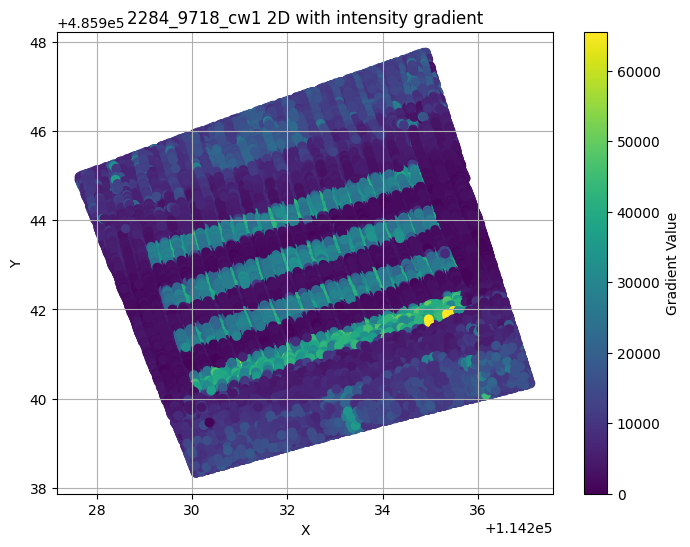

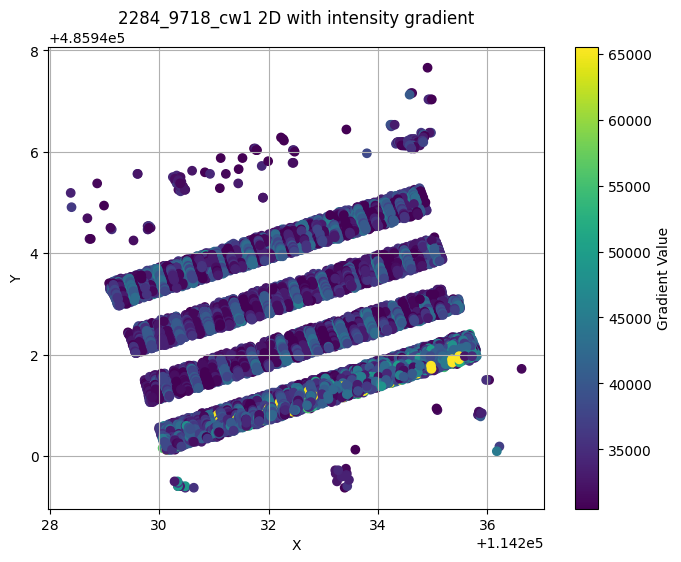

In [22]:
cw_list[2] = clean_cw_coords(cw_list[2], -1.2, -0.3, 2)
cw_list[2] = filter_intensity(cw_list[2], 30000)
plot_cw(cw_list[2], cw_list[2]['clean_coords'], cw_list[2]['clean_intensity'])
plot_cw(cw_list[2], cw_list[2]['clean_intensity_coords'], cw_list[2]['clean_intensity_threshold'])

## Crosswalk 3
<img src="../data/samples/crosswalks/images/2287_9711_cw1 aerial.png" width="300" height="300">
<img src="../data/samples/crosswalks/images/2287_9711_cw1 PC.png" width="300" height="300">

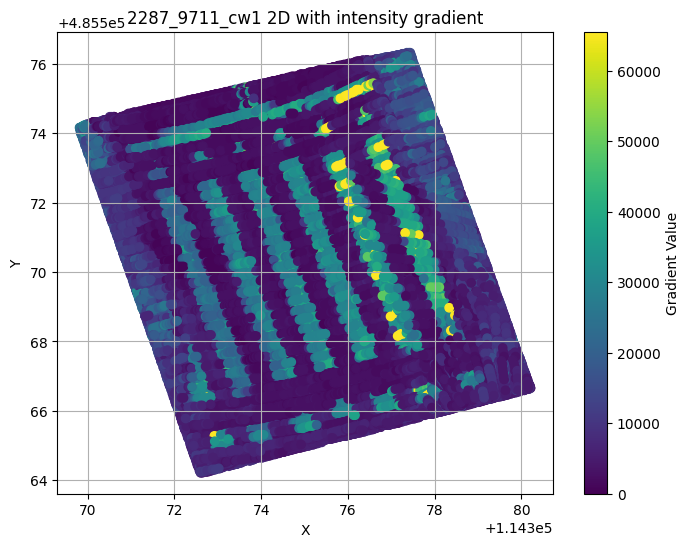

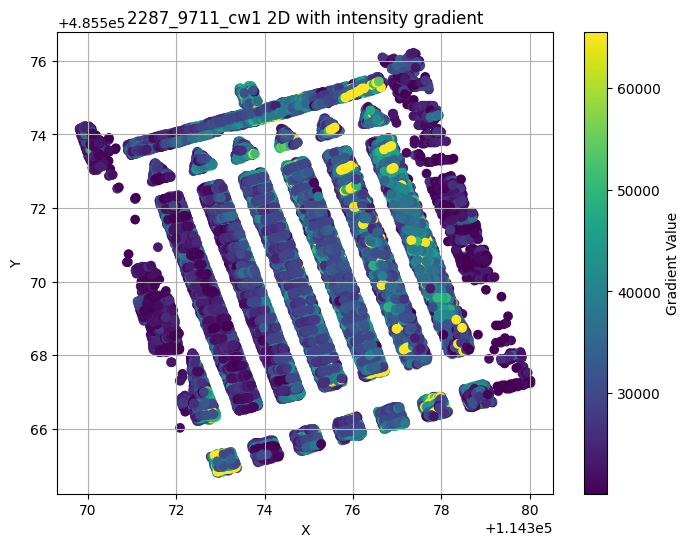

In [23]:
cw_list[3] = clean_cw_coords(cw_list[3], -1.2, -0.65, 2)
plot_cw(cw_list[3], cw_list[3]['clean_coords'], cw_list[3]['clean_intensity'])
cw_list[3] = filter_intensity(cw_list[3], 20000)
plot_cw(cw_list[3], cw_list[3]['clean_intensity_coords'], cw_list[3]['clean_intensity_threshold'])

## Crosswalk 4
<img src="../data/samples/crosswalks/images/2291_9698_cw1 aerial.png" width="300" height="300">
<img src="../data/samples/crosswalks/images/2291_9698_cw1 PC.png" width="300" height="300">

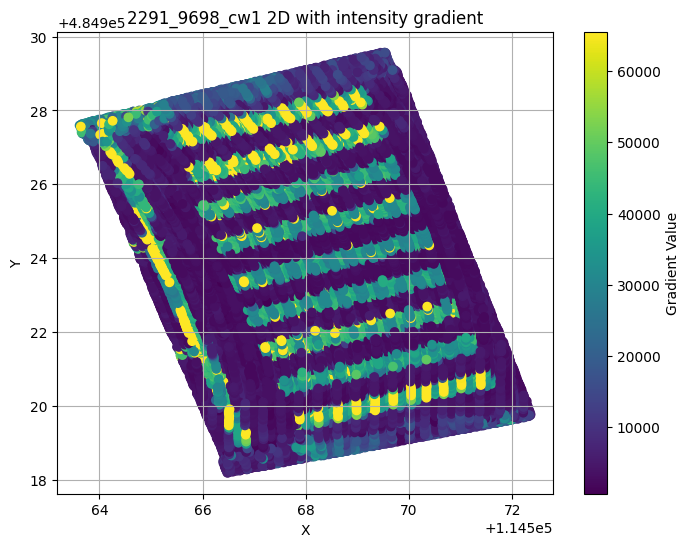

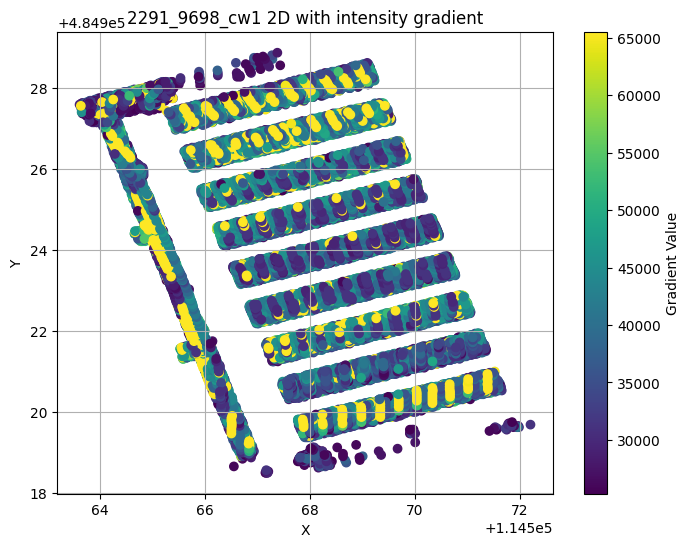

In [24]:
cw_list[4] = clean_cw_coords(cw_list[4], -1.2, 0, 2)
plot_cw(cw_list[4], cw_list[4]['clean_coords'], cw_list[4]['clean_intensity'])
cw_list[4] = filter_intensity(cw_list[4], 25000)
plot_cw(cw_list[4], cw_list[4]['clean_intensity_coords'], cw_list[4]['clean_intensity_threshold'])

## Crosswalk 5
<img src="../data/samples/crosswalks/images/2292_9721_cw1 aerial.png" width="300" height="300">
<img src="../data/samples/crosswalks/images/2292_9721_cw1 PC.png" width="300" height="300">

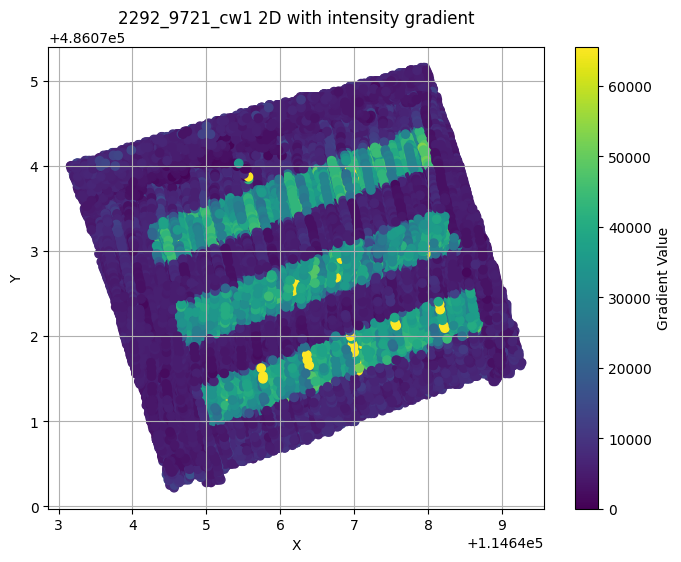

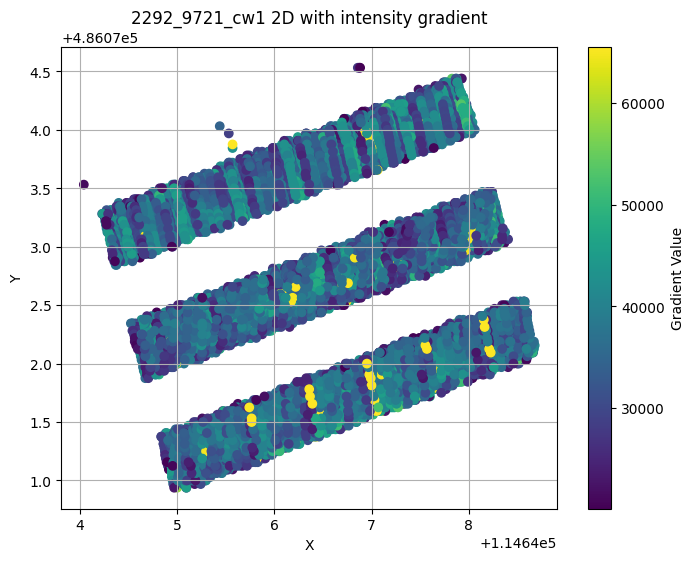

In [25]:
cw_list[5] = clean_cw_coords(cw_list[5], -1.1, -0.85, 2)
plot_cw(cw_list[5], cw_list[5]['clean_coords'], cw_list[5]['clean_intensity'])
cw_list[5] = filter_intensity(cw_list[5], 20000)
plot_cw(cw_list[5], cw_list[5]['clean_intensity_coords'], cw_list[5]['clean_intensity_threshold'])